### https://ocw.mit.edu/courses/sloan-school-of-management/15-071-the-analytics-edge-spring-2017/linear-regression/assignment-2/state-data

# <font color='green'>State Data</font>
#### We often take data for granted. However, one of the hardest parts about analyzing a problem you're interested in can be to find good data to answer the questions you want to ask. As you're learning R, though, there are many datasets that R has built in that you can take advantage of.
#### In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to, region the state belongs to, and two-letter abbreviation.
#### Load the dataset and convert it to a data frame by running the following two commands in R:
#### data(state)
#### statedata = cbind(data.frame(state.x77), state.abb, state.area, state.center,  state.division, state.name, state.region)
#### If you can't access the state dataset in R, here is a CSV file with the same data that you can load into R using the read.csv function: statedata (CSV).
#### After you have loaded the data into R, inspect the data set using the command: str(statedata)
#### This dataset has 50 observations (one for each US state) and the following 15 variables:     
- Population - the population estimate of the state in 1975
- Income - per capita income in 1974
- Illiteracy - illiteracy rates in 1970, as a percent of the population
- Life.Exp - the life expectancy in years of residents of the state in 1970
- Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976 
- HS.Grad - percent of high-school graduates in 1970
- Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state
- Area - the land area (in square miles) of the state
- state.abb - a 2-letter abreviation for each state
- state.area - the area of each state, in square miles
- x - the longitude of the center of the state
- y - the latitude of the center of the state
- state.division - the division each state belongs to (New England, Middle Atlantic, South Atlantic, East South Central, West South Central, East North Central, West North Central, Mountain, or Pacific)
- state.name - the full names of each state
- state.region - the region each state belong to (Northeast, South, North Central, or West)

In [1]:
statedata <- read.csv('../data/statedata.csv')
str(statedata)

'data.frame':	50 obs. of  15 variables:
 $ Population    : int  3615 365 2212 2110 21198 2541 3100 579 8277 4931 ...
 $ Income        : int  3624 6315 4530 3378 5114 4884 5348 4809 4815 4091 ...
 $ Illiteracy    : num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp      : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder        : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad       : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost         : int  20 152 15 65 20 166 139 103 11 60 ...
 $ Area          : int  50708 566432 113417 51945 156361 103766 4862 1982 54090 58073 ...
 $ state.abb     : Factor w/ 50 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 8 9 10 ...
 $ state.area    : int  51609 589757 113909 53104 158693 104247 5009 2057 58560 58876 ...
 $ x             : num  -86.8 -127.2 -111.6 -92.3 -119.8 ...
 $ y             : num  32.6 49.2 34.2 34.7 36.5 ...
 $ state.division: Factor w/ 9 levels "East North Central",..: 2 6 4 9 6 4 5 7 7 7 ...
 $ state.nam

# Problem 1.1 - Data Exploration
#### We begin by exploring the data. Plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot should look like the outline of the United States! Note that Alaska and Hawaii have had their coordinates adjusted to appear just off of the west coast.
#### In the R command you used to generate this plot, which variable name did you use as the first argument?
- <font color='red'>statedata\\$y</font><br>
- <font color='red'>statedata\\$x</font> # Correct<br>
- <font color='red'>I used a different variable name.</font><br>

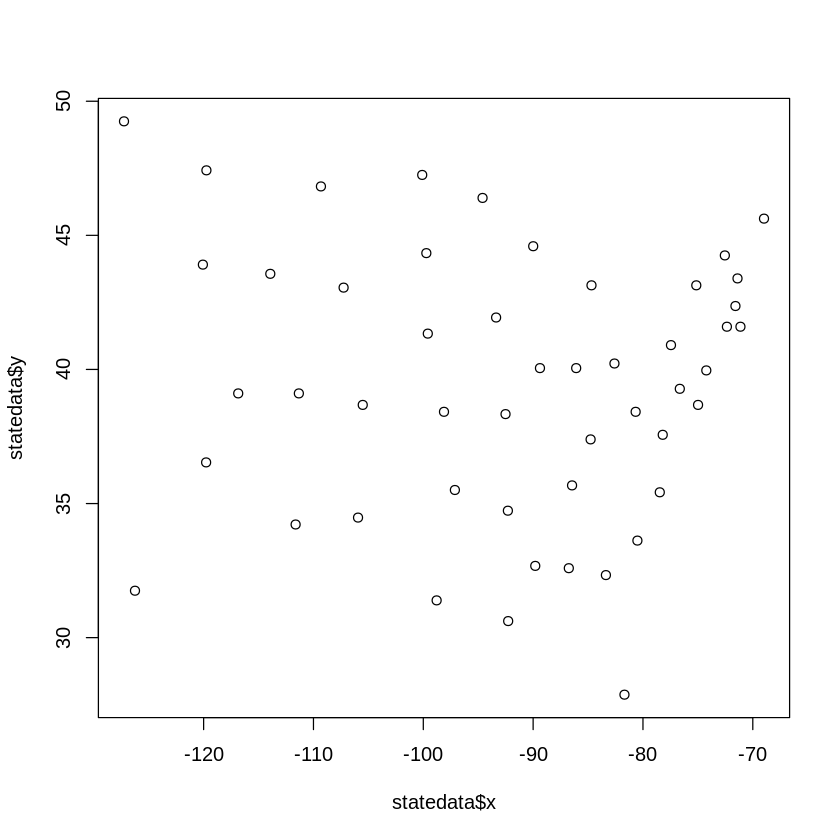

In [2]:
plot(statedata$x, statedata$y)

# Problem 1.2 - Data Exploration
#### Using the tapply command, determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region:
- <font color='red'>West</font> # Correct <br>
- <font color='red'>North Central</font><br>
- <font color='red'>South</font><br>
- <font color='red'>Northeast</font><br>

In [3]:
which.max(tapply(statedata$HS.Grad, statedata$state.region, sum))

West 
   4

# Problem 1.3 - Data Exploration
#### Now, make a boxplot of the murder rate by region (for more information about creating boxplots in R, type ?boxplot in your console).
#### Which region has the highest median murder rate?
- <font color='red'>Northeast</font><br>
- <font color='red'>South</font><br>
- <font color='red'>North Central</font><br>
- <font color='red'>West</font><br>

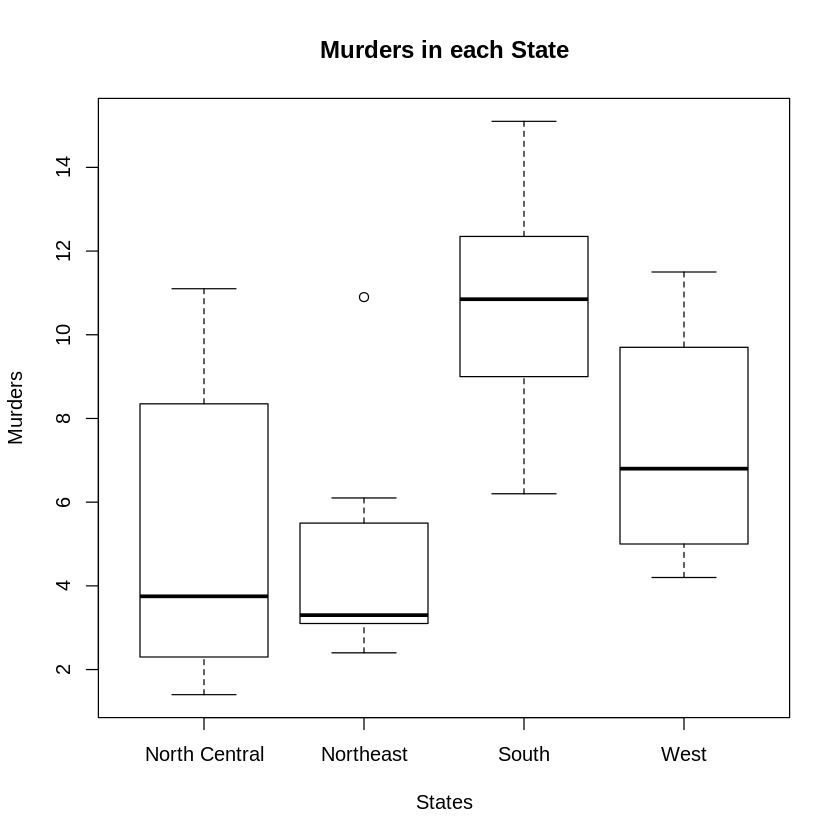

In [4]:
boxplot(statedata$Murder ~ statedata$state.region, xlab='States', ylab="Murders", main="Murders in each State")

# Problem 1.4 - Data Exploration
#### You should see that there is an outlier in the Northeast region of the boxplot you just generated. Which state does this correspond to? (Hint: There are many ways to find the answer to this question, but one way is to use the subset command to only look at the Northeast data.)
- <font color='red'>Delaware</font><br>
- <font color='red'>Rhode Island</font><br>
- <font color='red'>Maine</font><br>
- <font color='red'>New York</font> # Correct <br>

In [5]:
a <- subset(statedata, state.region == "Northeast")
subset(a, a$Murder == max(a$Murder))$state.name

[1] New York
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

# Problem 2.1 - Predicting Life Expectancy - An Initial Model
#### We would like to build a model to predict life expectancy by state using the state statistics we have in our dataset.<br>
#### Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note that you should use the variable "Area" in your model, NOT the variable "state.area".<br>
#### What is the coefficient for "Income" in your linear regression model?

In [6]:
model1 <- lm(Life.Exp ~ Population + Income + Illiteracy +  Murder + HS.Grad + Frost + 
             Area,data=statedata)
a  <- summary(model1)
a$coefficients["Income",][1]

Estimate 
-2.180424e-05

# Problem 2.2 - Predicting Life Expectancy - An Initial Model
#### Call the coefficient for income x (the answer to Problem 2.1). What is the interpretation of the coefficient x?<br>
- <font color='red'>For a one unit increase in income, predicted life expectancy increases by |x|</font><br>
- <font color='red'>For a one unit increase in income, predicted life expectancy decreases by |x|</font> # Correct <br>
- <font color='red'>For a one unit increase in predicted life expectancy, income decreases by |x|</font><br>
- <font color='red'>For a one unit increase in predicted life expectancy, income increases by |x|</font><br>

# Problem 2.3 - Predicting Life Expectancy - An Initial Model
#### Now plot a graph of life expectancy vs. income using the command:
#### plot(statedata\\$Income, statedata\\$Life.Exp)
#### Visually observe the plot. What appears to be the relationship?
- <font color='red'>Life expectancy is somewhat positively correlated with income.</font> # Correct <br>
- <font color='red'>Life expectancy is somewhat negatively correlated with income.</font><br>
- <font color='red'>Life expectancy is not correlated with income.</font><br>

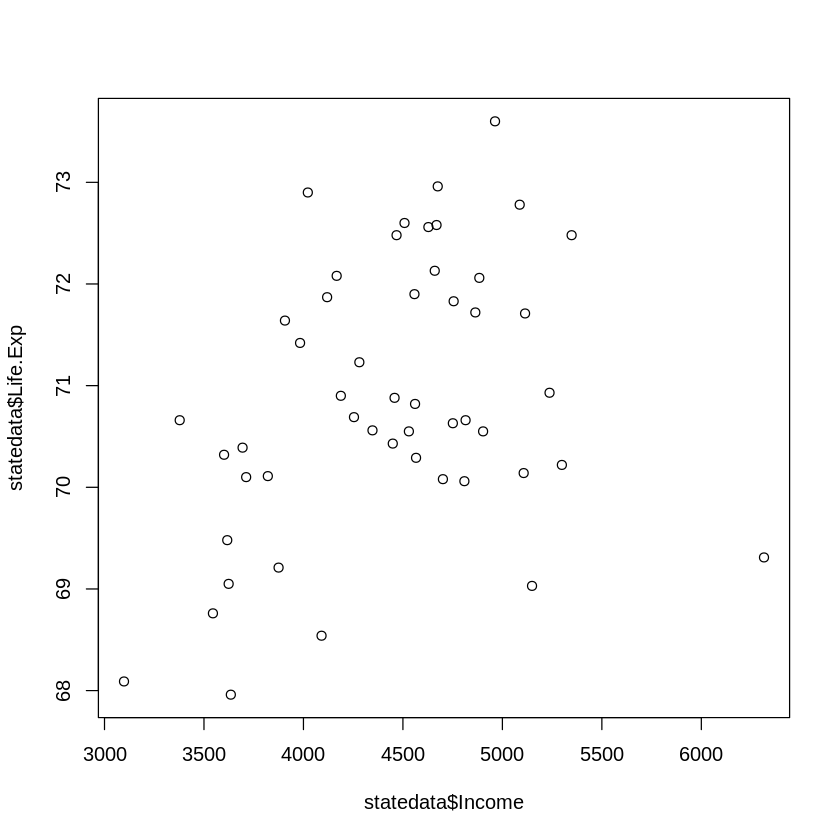

In [7]:
plot(statedata$Income, statedata$Life.Exp)

# Problem 2.4 - Predicting Life Expectancy - An Initial Model
#### The model we built does not display the relationship we saw from the plot of life expectancy vs. income. Which of the following explanations seems the most reasonable?
- <font color='red'>Income is not related to life expectancy.</font><br>
- <font color='red'>Multicollinearity</font> # Correct <br>

# Problem 3.1 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions<br>
#### Recall that we discussed the principle of simplicity: that is, a model with fewer variables is preferable to a model with many unnnecessary variables. Experiment with removing independent variables from the original model. Remember to use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time (this is called "backwards variable selection"). This is important due to multicollinearity issues - removing one insignificant variable may make another previously insignificant variable become significant.<br>
#### You should be able to find a good model with only 4 independent variables, instead of the original 7. Which variables does this model contain?
- <font color='red'>Income, HS.Grad, Frost, Murder</font><br>
- <font color='red'>HS.Grad, Population, Income, Frost</font><br>
- <font color='red'>Frost, Murder, HS.Grad, Illiteracy</font><br>
- <font color='red'>Population, Murder, Frost, HS.Grad</font> # Correct <br>

In [8]:
model2 <- lm(Life.Exp ~ Population +  Murder + HS.Grad + Frost,data=statedata)
summary(model2)


Call:
lm(formula = Life.Exp ~ Population + Murder + HS.Grad + Frost, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


# Problem 3.2 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions<br>
#### Removing insignificant variables changes the Multiple R-squared value of the model. By looking at the summary output for both the initial model (all independent variables) and the simplified model (only 4 independent variables) and using what you learned in class, which of the following correctly explains the change in the Multiple R-squared value?
- <font color='red'>We expect the "Multiple R-squared" value of the simplified model to be slightly worse than that of the initial model. It can't be better than the "Multiple R-squared" value of the initial model.</font> # Correct <br>
- <font color='red'>We expect the "Multiple R-squared" value of the simplified model to be slightly better than that of the initial model. It can't be worse than the "Multiple R-squared" value of the initial model.</font><br>
- <font color='red'>We expect the "Multiple R-squared" of the simplified model to be about the same as the intial model (we have no way of knowing if it will be slightly worse or slightly better than the Multiple R-squared of the intial model).</font><br>

# Problem 3.3 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
#### Using the simplified 4 variable model that we created, we'll now take a look at how our predictions compare to the actual values.<br>
#### Take a look at the vector of predictions by using the predict function (since we are just looking at predictions on the training set, you don't need to pass a "newdata" argument to the predict function).<br>
#### Which state do we predict to have the lowest life expectancy? (Hint: use the sort function)<br>
- <font color='red'>South Carolina</font><br>
- <font color='red'>Mississippi</font><br>
- <font color='red'>Alabama</font> # Correct <br>
- <font color='red'>Georgia</font><br>

In [9]:
pred <- predict(model2)
new_data <- statedata
new_data$pridictions <- pred
which.min(tapply(new_data$pridictions, new_data$state.name, sum))

Alabama 
      1

### Which state actually has the lowest life expectancy? (Hint: use the which.min function)
- <font color='red'>South Carolina</font> # Correct <br>
- <font color='red'>Mississippi</font><br>
- <font color='red'>Alabama</font><br>
- <font color='red'>Georgia</font><br>

In [10]:
which.min(tapply(new_data$Life.Exp, new_data$state.name, sum))

South Carolina 
            40

# Problem 3.4 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
#### Which state do we predict to have the highest life expectancy?
- <font color='red'>Massachusetts</font><br>
- <font color='red'>Maine</font><br>
- <font color='red'>Washington</font> # Correct <br>
- <font color='red'>Hawaii</font><br>

In [11]:
which.max(tapply(new_data$pridictions, new_data$state.name, sum))

Washington 
        47

#### Which state actually has the highest life expectancy?
- <font color='red'>Massachusetts</font><br>
- <font color='red'>Maine</font><br>
- <font color='red'>Washington</font><br>
- <font color='red'>Hawaii</font> # Correct <br>

In [12]:
which.max(tapply(new_data$Life.Exp, new_data$state.name, sum))

Hawaii 
    11

# Problem 3.5 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions<br>
### Take a look at the vector of residuals (the difference between the predicted and actual values).<br>
### For which state do we make the smallest absolute error?
- <font color='red'>Maine</font><br>
- <font color='red'>Florida</font><br>
- <font color='red'>Indiana</font><br>
- <font color='red'>Illinois</font><br>

In [13]:
statedata[which.min(abs(model2$residuals)),]$state.name

[1] Indiana
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

#### For which state do we make the largest absolute error?
- <font color='red'>Hawaii</font><br>
- <font color='red'>Maine</font><br>
- <font color='red'>Texas</font><br>
- <font color='red'>South Carolina</font><br>

In [14]:
statedata[which.max(abs(model2$residuals)),]$state.name

[1] Hawaii
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming